# Craps Game

O CRAPS é um jogo de dados (famoso em cassinos), em que o jogador lança dois dados, então soma-se as faces dos dados:

- Se a soma for **7 ou 11** na primeira rodada, o *jogador ganha*;
- Se for **2, 3 ou 12** na primeira rodada (ou CRAPS) o *jogador perde*.   
- Se a soma for **4, 5, 6, 8, 9 ou 10** na primeira rodada. Então esta soma se torna o ponto do jogador. 
  - Para ganhar, o jogador continua jogando o dado até a soma ser igual a seu ponto. 
  - O jogador perde se a soma for igual a 7.

In [2]:
# to run graphic
%matplotlib inline 
from matplotlib import animation
from IPython.display import HTML
import sys

# Importações necessárias
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Função responsável por rolar dados
def roll_dice():
    """Função que rola dois dados.

    Returns:
        tuple: retorno é uma tupla com o resultado empacotado.
    """
    die1 = random.randrange(1, 7)
    die2 = random.randrange(1, 7)
    return (die1, die2)


# Função que mostra o valor dos dados
def display_dice(dice):
    """Exibe na tela os dados e a respectiva soma.

    Args:
        dice (tuple): Uma tupla com valor de cada dado sorteado.
    """
    die1, die2 = dice
    print(f'Result: {die1} + {die2} = {sum(dice)}')


# Função do jogo CRAPS
def craps():
    """Função que realiza uma rodada do jogo CRAPS7

    Returns: 
        tuple: 1º - round em que ganhou ou perdeu; 2º - vitória ou derrota.
    """

    die_values = roll_dice()  # primeira rodada
    # display_dice(die_values)

    sum_dies = sum(die_values)

    roll = 1

    if sum_dies in (7, 11):  # condição de vitória
        game_status = 'WON'
    elif sum_dies in (2, 3, 12):  # condição de derrota
        game_status = 'LOSE'
    else:  # segue o jogo
        game_status = 'CONTINUE'
        player_point = sum_dies
        # print(f'My point is {player_point}')

    # looping até chegar condição de vitoria ou derrota
    while game_status == 'CONTINUE':
        die_values = roll_dice()  # outras rodadas
        # display_dice(die_values)
        sum_dies = sum(die_values)

        if roll > 11:
            roll = 12
        else:
            roll += 1

        if sum_dies == player_point:
            game_status = 'WON'
        elif sum_dies == 7:
            game_status = 'LOSE'

    # Mensagem de vitória ou derrota
    if game_status == 'WON':
        # print(f'Congratulations, you WIN in {roll}º round!')
        return (roll, game_status)
    else:
        # print(f'You LOSE in {roll}º round, try again!')
        return (roll, game_status)

## Exercício proposto

Reimplemente sua solução para o Exercício da aula anterior (Analisando Craps), usando as técnicas que você aprendeu para criar um gráfico de barras dinâmico mostrando as vitórias e derrotas no primeiro lançamento, segundo lançamento terceiro, etc.

## Plotagem do gráfico

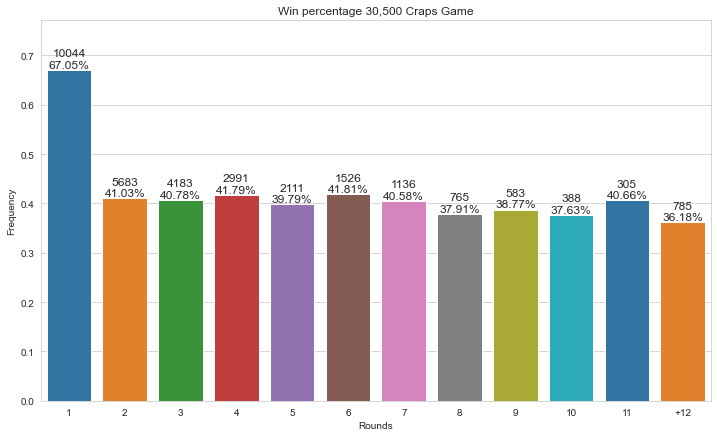

In [21]:
def update(frame_number, rolls_frame, rounds, r_vit, r_der, rolls):
    for i in range(rolls_frame):
        # Realizar "i" jogos CRAPS
        turn, status = craps()

        if turn < 12:
            rolls[turn - 1] += 1
            if status == 'WON':
                r_vit[turn - 1] += 1
        else:
            rolls[11] += 1
            if status == 'WON':
                r_vit[11] += 1


    frequencies = [r_vit[rw]/rolls[rw] for rw in range(len(r_vit))]          

    # reconfigure plot for updated die frequencies
    plt.cla()  # clear old contents contents of current Figure
    axes = sns.barplot(rounds, frequencies, palette='tab10')  # new bars
    axes.set_title(f'Win percentage {sum(rolls):,} Craps Game')
    axes.set(xlabel='Rounds', ylabel='Frequency')  
    axes.set_ylim(top=max(frequencies) * 1.15)  # scale y-axis by 10%

    # display frequency & percentage above each patch (bar)
    cont = 0
    for bar, frequency in zip(axes.patches, frequencies):
        text_x = bar.get_x() + bar.get_width() / 2.0  
        text_y = bar.get_height() 
        text = f'{rolls[cont]}\n{frequency:.2%}'
        cont += 1
        axes.text(text_x, text_y, text, fontsize=12, ha='center', va='bottom')

# read command-line arguments for number of frames and rolls per frame
number_of_frames = 60
rolls_per_frame = 500

figure = plt.figure('Analyzing Craps Game', figsize=(12, 7))  # Figure for animation
sns.set_style('whitegrid')  # white background with gray grid lines
values = list(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '+12'])  # round number for display on x-axis

rolls = [0] * 12 
r_vit = [0] * 12
r_der = [0] * 12

# configure and start animation that calls function update
craps_animation = animation.FuncAnimation (
    figure, update, repeat=False, frames=number_of_frames, interval=33, fargs=(rolls_per_frame, values, r_vit, r_der, rolls)
)

HTML(craps_animation.to_jshtml())